In [29]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
df = pd.read_csv('/Users/hadjer/Desktop/dataset_GAB.csv')
df

,nbr_semaine,saison,Plage_horaire,Week_End,Evenements_Religieux,Evenements_Nationaux,Gab_Code,GabAgence,CodeAgence,CodeWilaya,...,retrait_Semaine,Nbr_Transaction_Weekend,retrait_Weekend,Nbr_Transaction_Evenements_Religieux,retrait_Evenements_Religieux,Nbr_Transaction_Evenements_Nationaux,retrait_Evenements_Nationaux,evenements,nbr_transaction_evenement,retrait_evenement
0,1,hiver,après-midi,0,NaN,"""jour l An""",800005027,"""CHERAGA \r""",17030,16,...,1655000,0,0,0,0,32,345000,"""jour l An""",32,345000
1,1,hiver,après-midi,0,NaN,"""jour l An""",800010027,"""DAR EL BEIDA \r""",17070,16,...,2169000,0,0,0,0,43,1008000,"""jour l An""",43,1008000
2,1,hiver,après-midi,0,NaN,"""jour l An""",800019027,"""ORAN USTO \r""",17100,31,...,1810000,0,0,0,0,20,355000,"""jour l An""",20,355000
3,1,hiver,après-midi,0,NaN,"""jour l An""",800022027,"""BEJAIA \r""",17130,6,...,709000,0,0,0,0,15,168000,"""jour l An""",15,168000
4,1,hiver,après-midi,0,NaN,"""jour l An""",800023027,"""BEJAIA \r""",17130,6,...,279000,0,0,0,0,5,80000,"""jour l An""",5,80000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18432,53,hiver,midi,1,NaN,NaN,800242027,"""AGENCE HO.BAB EZZOUAR \r""",17800,16,...,2000,1,2000,0,0,0,0,NaN,0,0
18433,53,hiver,soir,1,NaN,NaN,800029027,"""BORDJ EL KIFFAN \r""",17190,16,...,638000,52,638000,0,0,0,0,NaN,0,0
18434,53,hiver,soir,1,NaN,NaN,800043027,"""HASSI MESSAOUD \r""",17330,30,...,2000,1,2000,0,0,0,0,NaN,0,0
18435,53,hiver,soir,1,NaN,NaN,800145027,"""ORAN USTO \r""",17100,31,...,18000,3,18000,0,0,0,0,NaN,0,0


## Verification des valeurs manquantes

In [2]:
df.info() 
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18437 entries, 0 to 18436
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   nbr_semaine                           18437 non-null  int64 
 1   saison                                18437 non-null  object
 2   Plage_horaire                         18437 non-null  object
 3   Week_End                              18437 non-null  int64 
 4   Evenements_Religieux                  3188 non-null   object
 5   Evenements_Nationaux                  1777 non-null   object
 6   Gab_Code                              18437 non-null  int64 
 7   GabAgence                             18437 non-null  object
 8   CodeAgence                            18437 non-null  int64 
 9   CodeWilaya                            18437 non-null  int64 
 10  position_Geographique                 18437 non-null  object
 11  Nbr_Transaction_Semaine     

nbr_semaine                                 0
saison                                      0
Plage_horaire                               0
Week_End                                    0
Evenements_Religieux                    15249
Evenements_Nationaux                    16660
Gab_Code                                    0
GabAgence                                   0
CodeAgence                                  0
CodeWilaya                                  0
position_Geographique                       0
Nbr_Transaction_Semaine                     0
retrait_Semaine                             0
Nbr_Transaction_Weekend                     0
retrait_Weekend                             0
Nbr_Transaction_Evenements_Religieux        0
retrait_Evenements_Religieux                0
Nbr_Transaction_Evenements_Nationaux        0
retrait_Evenements_Nationaux                0
evenements                              13472
nbr_transaction_evenement                   0
retrait_evenement                 

##### il n ya pas de valeurs manquantes.

## Identification des valeurs aberrantes:

### 1-Identification des outliers univariées

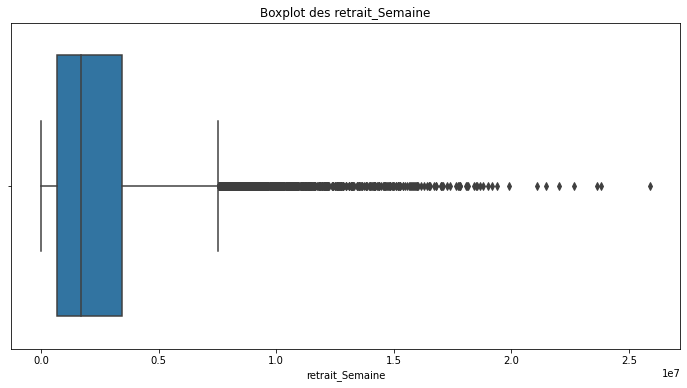

In [3]:
# Visualiser les outliers en utilisant un boxplot 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='retrait_Semaine')
plt.xlabel('retrait_Semaine')
plt.title("Boxplot des retrait_Semaine")
plt.show()

In [7]:
#upper_lim=df['retrait_Semaine'].quantile(.95): Cette ligne calcule le 95e percentile 
#des valeurs dans la colonne 'retrait_Semaine'. Cela signifie que 95% des valeurs de 
#cette colonne sont inférieures ou égales à cette limite.
upper_lim=df['retrait_Semaine'].quantile(.95)
df_outliers=df[df['retrait_Semaine']>upper_lim]
df_outliers

,nbr_semaine,saison,Plage_horaire,Week_End,Evenements_Religieux,Evenements_Nationaux,Gab_Code,GabAgence,CodeAgence,CodeWilaya,...,retrait_Semaine,Nbr_Transaction_Weekend,retrait_Weekend,Nbr_Transaction_Evenements_Religieux,retrait_Evenements_Religieux,Nbr_Transaction_Evenements_Nationaux,retrait_Evenements_Nationaux,evenements,nbr_transaction_evenement,retrait_evenement
218,1,hiver,matin,0,NaN,"""jour l An""",800071027,"""SKIKDA \r""",17600,21,...,7829000,0,0,0,0,0,0,"""jour l An""",0,0
431,2,hiver,matin,1,NaN,Nouvel an amazigh,800045027,"""HUSSEIN DEY \r""",17350,16,...,9028000,108,2283000,0,0,34,775000,Nouvel an amazigh,34,775000
432,2,hiver,matin,1,NaN,Nouvel an amazigh,800046027,"""ANNABA II \r""",17360,23,...,14222000,150,3120000,0,0,171,5469000,Nouvel an amazigh,171,5469000
436,2,hiver,matin,1,NaN,Nouvel an amazigh,800071027,"""SKIKDA \r""",17600,21,...,15471000,13,263000,0,0,161,4262000,Nouvel an amazigh,161,4262000
440,2,hiver,matin,1,NaN,Nouvel an amazigh,800078027,"""ARZEW \r""",17670,31,...,7851000,76,2094000,0,0,49,1639000,Nouvel an amazigh,49,1639000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18079,52,hiver,matin,1,NaN,NaN,800131027,"""Canstantineadl \r""",17530,25,...,12603000,1,2000,0,0,0,0,NaN,0,0
18100,52,hiver,après-midi,1,NaN,NaN,800046027,"""ANNABA II \r""",17360,23,...,10637000,0,0,0,0,0,0,NaN,0,0
18101,52,hiver,après-midi,1,NaN,NaN,800131027,"""Canstantineadl \r""",17530,25,...,10470000,0,0,0,0,0,0,NaN,0,0
18103,52,hiver,après-midi,1,NaN,NaN,800176027,"""ORAN SOUMAM \r""",17440,31,...,8334000,0,0,0,0,0,0,NaN,0,0


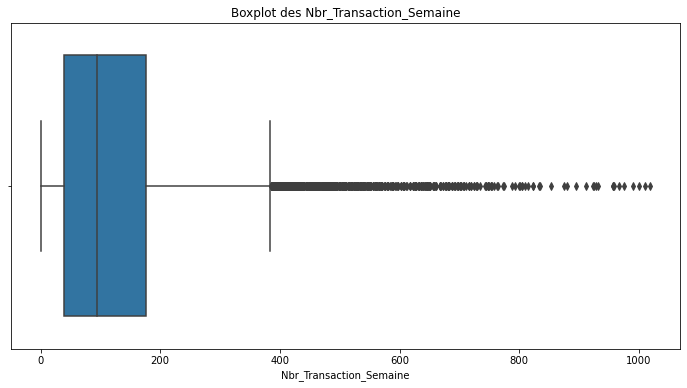

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Nbr_Transaction_Semaine')
plt.xlabel('Nbr_Transaction_Semaine')
plt.title("Boxplot des Nbr_Transaction_Semaine")
plt.show()

In [10]:
upper_lim=df['Nbr_Transaction_Semaine'].quantile(.95)
df_outliers=df[df['Nbr_Transaction_Semaine']>upper_lim]
df_outliers

,nbr_semaine,saison,Plage_horaire,Week_End,Evenements_Religieux,Evenements_Nationaux,Gab_Code,GabAgence,CodeAgence,CodeWilaya,...,retrait_Evenements_Nationaux,evenements,nbr_transaction_evenement,retrait_evenement,outlier_retrait_Semaine,outlier_Nbr_Transaction_Semaine,outlier_retrait_Weekend,outlier_Nbr_Transaction_Weekend,outlier_retrait_evenement,outlier_nbr_transaction_evenement
218,1,hiver,matin,0,NaN,"""jour l An""",800071027,"""SKIKDA \r""",17600,21,...,0,"""jour l An""",0,0,-1,-1,1,1,1,1
431,2,hiver,matin,1,NaN,Nouvel an amazigh,800045027,"""HUSSEIN DEY \r""",17350,16,...,775000,Nouvel an amazigh,34,775000,-1,-1,1,1,1,1
432,2,hiver,matin,1,NaN,Nouvel an amazigh,800046027,"""ANNABA II \r""",17360,23,...,5469000,Nouvel an amazigh,171,5469000,-1,-1,-1,-1,-1,-1
436,2,hiver,matin,1,NaN,Nouvel an amazigh,800071027,"""SKIKDA \r""",17600,21,...,4262000,Nouvel an amazigh,161,4262000,-1,-1,1,1,-1,-1
460,2,hiver,matin,1,NaN,Nouvel an amazigh,800205027,"""AGENCE JIJEL \r""",17770,18,...,3223000,Nouvel an amazigh,131,3223000,1,-1,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,52,hiver,soir,1,NaN,NaN,800219027,"""BORDJ EL KIFFAN \r""",17190,16,...,0,NaN,0,0,-1,-1,-1,1,1,1
18079,52,hiver,matin,1,NaN,NaN,800131027,"""Canstantineadl \r""",17530,25,...,0,NaN,0,0,-1,-1,1,1,1,1
18100,52,hiver,après-midi,1,NaN,NaN,800046027,"""ANNABA II \r""",17360,23,...,0,NaN,0,0,-1,-1,1,1,1,1
18101,52,hiver,après-midi,1,NaN,NaN,800131027,"""Canstantineadl \r""",17530,25,...,0,NaN,0,0,-1,-1,1,1,1,1


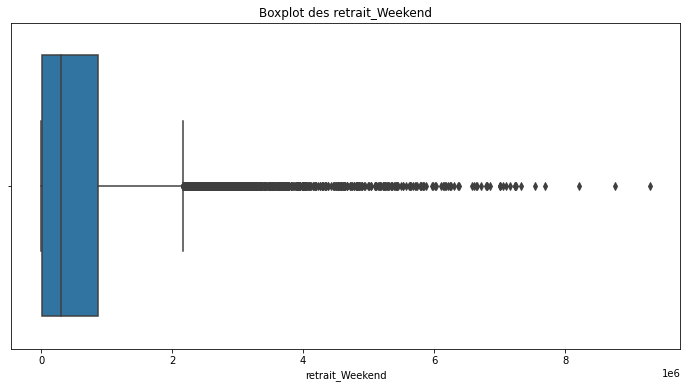

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='retrait_Weekend')
plt.xlabel('retrait_Weekend')
plt.title("Boxplot des retrait_Weekend")
plt.show()

In [12]:
upper_lim=df['retrait_Weekend'].quantile(.95)
df_outliers=df[df['retrait_Weekend']>upper_lim]
df_outliers

,nbr_semaine,saison,Plage_horaire,Week_End,Evenements_Religieux,Evenements_Nationaux,Gab_Code,GabAgence,CodeAgence,CodeWilaya,...,retrait_Evenements_Nationaux,evenements,nbr_transaction_evenement,retrait_evenement,outlier_retrait_Semaine,outlier_Nbr_Transaction_Semaine,outlier_retrait_Weekend,outlier_Nbr_Transaction_Weekend,outlier_retrait_evenement,outlier_nbr_transaction_evenement
368,2,hiver,après-midi,1,NaN,Nouvel an amazigh,800046027,"""ANNABA II \r""",17360,23,...,0,Nouvel an amazigh,0,0,1,1,-1,1,1,1
429,2,hiver,matin,1,NaN,Nouvel an amazigh,800039027,"""SETIF \r""",17290,19,...,0,Nouvel an amazigh,0,0,1,1,-1,-1,1,1
432,2,hiver,matin,1,NaN,Nouvel an amazigh,800046027,"""ANNABA II \r""",17360,23,...,5469000,Nouvel an amazigh,171,5469000,-1,-1,-1,-1,-1,-1
435,2,hiver,matin,1,NaN,Nouvel an amazigh,800058027,"""BOUMERDES II \r""",17470,35,...,0,Nouvel an amazigh,0,0,1,1,-1,1,1,1
468,2,hiver,matin,1,NaN,Nouvel an amazigh,800217027,"""HUSSEIN DEY \r""",17350,16,...,714000,Nouvel an amazigh,31,714000,1,1,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18293,53,hiver,matin,1,NaN,NaN,800222027,"""DRARIA \r""",17110,16,...,0,NaN,0,0,1,1,-1,1,1,1
18298,53,hiver,matin,1,NaN,NaN,800228027,"""LES SOURCES \r""",17210,16,...,0,NaN,0,0,1,1,-1,1,1,1
18387,53,hiver,soir,1,NaN,NaN,800177027,"""HASSI MESSAOUD \r""",17330,30,...,0,NaN,0,0,1,1,-1,-1,1,1
18405,53,hiver,soir,1,NaN,NaN,800219027,"""BORDJ EL KIFFAN \r""",17190,16,...,0,NaN,0,0,1,1,-1,-1,1,1


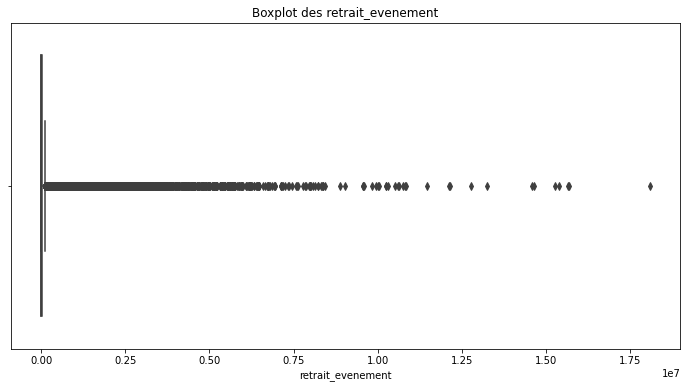

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='retrait_evenement')
plt.xlabel('retrait_evenement')
plt.title("Boxplot des retrait_evenement")
plt.show()

In [16]:
upper_lim=df['retrait_evenement'].quantile(.95)
df_outliers=df[df['retrait_evenement']>upper_lim]
df_outliers

,nbr_semaine,saison,Plage_horaire,Week_End,Evenements_Religieux,Evenements_Nationaux,Gab_Code,GabAgence,CodeAgence,CodeWilaya,...,retrait_Evenements_Nationaux,evenements,nbr_transaction_evenement,retrait_evenement,outlier_retrait_Semaine,outlier_Nbr_Transaction_Semaine,outlier_retrait_Weekend,outlier_Nbr_Transaction_Weekend,outlier_retrait_evenement,outlier_nbr_transaction_evenement
395,2,hiver,après-midi,1,NaN,Nouvel an amazigh,800205027,"""AGENCE JIJEL \r""",17770,18,...,1719000,Nouvel an amazigh,93,1719000,1,1,1,1,1,-1
401,2,hiver,après-midi,1,NaN,Nouvel an amazigh,800214027,"""CHLEF \r""",17570,2,...,2218000,Nouvel an amazigh,96,2218000,1,1,1,1,-1,-1
406,2,hiver,après-midi,1,NaN,Nouvel an amazigh,800221027,"""ANNABA II \r""",17360,23,...,2429000,Nouvel an amazigh,92,2429000,1,1,1,1,-1,-1
408,2,hiver,après-midi,1,NaN,Nouvel an amazigh,800224027,"""KOLEA \r""",17240,42,...,2621000,Nouvel an amazigh,132,2621000,1,1,1,1,-1,-1
409,2,hiver,après-midi,1,NaN,Nouvel an amazigh,800225027,"""TLEMCEN \r""",17320,13,...,1752000,Nouvel an amazigh,86,1752000,1,1,1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15262,44,automne,matin,1,NaN,Jour de Révolution,800131027,"""Canstantineadl \r""",17530,25,...,2382000,Jour de Révolution,130,2382000,-1,-1,-1,-1,-1,-1
15283,44,automne,matin,1,NaN,Jour de Révolution,800208027,"""BIRKHADEM \r""",17120,16,...,1668000,Jour de Révolution,59,1668000,1,1,1,1,1,1
15299,44,automne,matin,1,NaN,Jour de Révolution,800228027,"""LES SOURCES \r""",17210,16,...,1827000,Jour de Révolution,69,1827000,-1,1,-1,-1,-1,1
15454,44,automne,matin,1,NaN,Jour de Révolution,800029027,"""BORDJ EL KIFFAN \r""",17190,16,...,1785000,Jour de Révolution,111,1785000,1,1,1,1,-1,-1


##### Méthode d'isolation forest univariée:

In [3]:
from sklearn.ensemble import IsolationForest

# Liste des noms des variables numériques
variables_numeriques = ['retrait_Semaine', 'Nbr_Transaction_Semaine', 'retrait_Weekend', 'retrait_evenement']

# Paramètres de l'Isolation Forest
contamination = 0.05  # Proportion d'outliers attendue dans les données
random_state = 42  # Pour assurer la reproductibilité des résultats

# Initialisation d'un dictionnaire pour enregistrer les indices des outliers pour chaque variable
indices_outliers_par_variable = {}

# Boucle sur chaque variable numérique
for variable in variables_numeriques:
    # Création du modèle Isolation Forest
    isolation_forest = IsolationForest(contamination=contamination, random_state=random_state)
    
    # Ajustement du modèle aux données
    isolation_forest.fit(df[[variable]])
    
    # Prédiction des outliers
    df['outlier_' + variable] = isolation_forest.predict(df[[variable]])

# Affichage des outliers détectés pour chaque variable et enregistrement des indices
for variable in variables_numeriques:
    print(f"Outliers détectés pour la variable '{variable}':")
    print(df[df['outlier_' + variable] == -1][[variable]])
   

Outliers détectés pour la variable 'retrait_Semaine':
       retrait_Semaine
218            7829000
431            9028000
432           14222000
436           15471000
440            7851000
...                ...
18079         12603000
18100         10637000
18101         10470000
18103          8334000
18159          8552000

[921 rows x 1 columns]
Outliers détectés pour la variable 'Nbr_Transaction_Semaine':
       Nbr_Transaction_Semaine
218                        377
431                        423
432                        538
436                        678
460                        376
...                        ...
18067                      366
18079                      644
18100                      460
18101                      639
18103                      382

[920 rows x 1 columns]
Outliers détectés pour la variable 'retrait_Weekend':
       retrait_Weekend
365            2268000
368            2317000
429            3606000
432            3120000
435            2686

In [4]:
from sklearn.ensemble import IsolationForest

# Liste des noms des variables numériques
variables_numeriques = ['retrait_Semaine']
# Paramètres de l'Isolation Forest
contamination = 0.05  # Proportion d'outliers attendue dans les données
random_state = 42  # Pour assurer la reproductibilité des résultats

# Initialisation d'un dictionnaire pour enregistrer les indices des outliers pour chaque variable
indices_outliers_par_variable = {}

# Boucle sur chaque variable numérique
for variable in variables_numeriques:
    # Création du modèle Isolation Forest
    isolation_forest = IsolationForest(contamination=contamination, random_state=random_state)
    
    # Ajustement du modèle aux données
    isolation_forest.fit(df[[variable]])
    
    # Prédiction des outliers
    df['outlier_' + variable] = isolation_forest.predict(df[[variable]])
    
    # Enregistrement des indices des outliers pour la variable actuelle
    indices_outliers_par_variable[variable] = df.index[df['outlier_' + variable] == -1].tolist()

# Comptage des valeurs aberrantes par semaine pour chaque variable
aberrant_count_by_week = {}

# Boucle sur chaque variable numérique
for variable in variables_numeriques:
    # Récupération des semaines correspondant aux valeurs aberrantes
    semaines_aberrantes = df.loc[df['outlier_' + variable] == -1, 'nbr_semaine']
    
    # Comptage des valeurs aberrantes par semaine
    aberrant_count_by_week[variable] = semaines_aberrantes.value_counts()

# Affichage des semaines et du nombre de valeurs aberrantes pour chaque variable
for variable, aberrant_count in aberrant_count_by_week.items():
    print(f"Nombre de valeurs aberrantes pour la variable '{variable}':")
    print(aberrant_count)
    
    # Vérification de la présence d'un événement pour chaque semaine 
    for semaine, effectif in aberrant_count.items():
        evenement_correspondant = df.loc[df['nbr_semaine'] == semaine, 'evenements'].iloc[0]
        if pd.notna(evenement_correspondant):
            print(f"Semaine {semaine} : Événement correspondant - {evenement_correspondant}")
        else:
            print(f"Semaine {semaine} : Aucun événement correspondant")
    
    print("\n")


Nombre de valeurs aberrantes pour la variable 'retrait_Semaine':
25    50
38    40
16    40
29    39
12    38
51    38
34    38
47    31
52    31
42    30
30    28
45    26
43    26
50    21
36    21
37    21
26    21
32    20
48    20
40    20
33    19
49    19
39    18
23    17
28    17
20    17
41    16
46    15
31    15
10    14
8     14
21    13
24    12
44    10
11    10
35    10
6      9
4      9
3      9
27     8
19     7
7      7
2      6
17     6
14     6
22     5
9      5
13     3
18     2
5      2
15     1
1      1
Name: nbr_semaine, dtype: int64
Semaine 25 : Aucun événement correspondant
Semaine 38 : Aucun événement correspondant
Semaine 16 : Événement correspondant - RAMADAN
Semaine 29 : Événement correspondant - Mouharem
Semaine 12 : Aucun événement correspondant
Semaine 51 : Aucun événement correspondant
Semaine 34 : Aucun événement correspondant
Semaine 47 : Aucun événement correspondant
Semaine 52 : Aucun événement correspondant
Semaine 42 : Aucun événement correspond

## Réduction de l'asymétrie:

### Distribution de la variable 'retrait semaine' avant reduction:


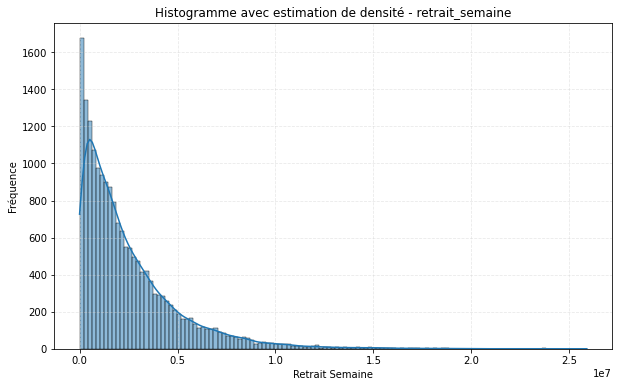

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = 'pastel'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='retrait_Semaine', kde=True,  palette =palette)
plt.title('Histogramme avec estimation de densité - retrait_semaine')
plt.xlabel('Retrait Semaine')
plt.ylabel('Fréquence')
# Modifier la couleur de la grille
plt.grid(True, linestyle='--', alpha=0.5, color='lightgrey')
plt.show()

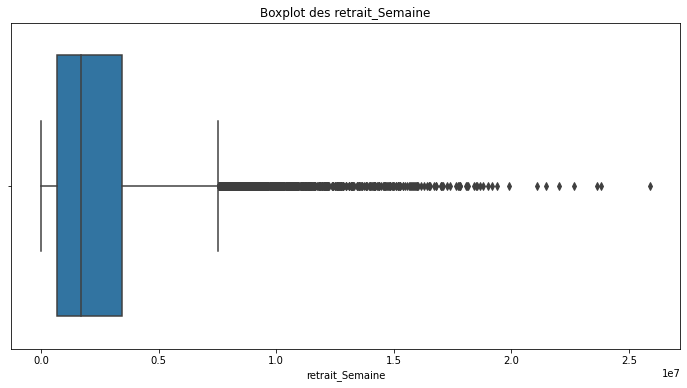

In [6]:
# Visualiser les outliers en utilisant un boxplot 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='retrait_Semaine')
plt.xlabel('retrait_Semaine')
plt.title("Boxplot des retrait_Semaine")
plt.show()

#### Trnsformation logarithmique :

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


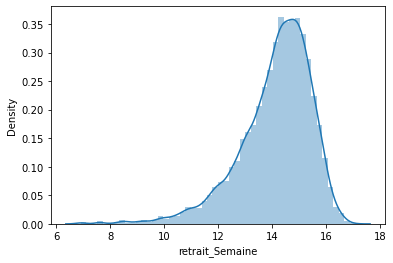

<Figure size 432x288 with 0 Axes>

In [25]:
df['retrait_Semaine']=np.log(df['retrait_Semaine'])
sns.distplot(df['retrait_Semaine'])
fig=plt.figure()

In [26]:
df['retrait_Semaine']

0        14.319312
1        14.589777
2        14.408837
3        13.471611
4        12.538967
           ...    
18432     7.600902
18433    13.366094
18434     7.600902
18435     9.798127
18436     8.699515
Name: retrait_Semaine, Length: 18437, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='retrait_Semaine'>

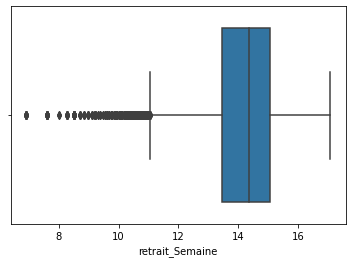

In [27]:
sns.boxplot(df['retrait_Semaine'])

In [28]:
(df['retrait_Semaine']).agg(['skew','kurtosis']).transpose()

skew       -1.193885
kurtosis    2.364161
Name: retrait_Semaine, dtype: float64

##### -skewness est négative cela indique une asymétrie vers la gauche.

#### Transformation de BOX-COX:

In [31]:
from scipy import stats

# Appliquer la transformation de Box-Cox à la variable 'retrait_Semaine'
transformed_retrait_semaine, lambda_value = stats.boxcox(df['retrait_Semaine'])

# Afficher la valeur optimale de lambda calculée par la méthode Box-Cox
print("Valeur optimale de lambda :", lambda_value)

Valeur optimale de lambda : 0.27019720926495416


In [32]:
from scipy.stats import boxcox

# Appliquer la transformation de Box-Cox avec la valeur optimale de lambda
transformed_retrait_semaine, lambda_value = boxcox(df['retrait_Semaine'])

# Mettre à jour la colonne 'retrait_Semaine' dans votre dataframe avec les données transformées
df['retrait_Semaine'] = transformed_retrait_semaine
df

,nbr_semaine,saison,Plage_horaire,Week_End,Evenements_Religieux,Evenements_Nationaux,Gab_Code,GabAgence,CodeAgence,CodeWilaya,...,retrait_Semaine,Nbr_Transaction_Weekend,retrait_Weekend,Nbr_Transaction_Evenements_Religieux,retrait_Evenements_Religieux,Nbr_Transaction_Evenements_Nationaux,retrait_Evenements_Nationaux,evenements,nbr_transaction_evenement,retrait_evenement
0,1,hiver,après-midi,0,NaN,"""jour l An""",800005027,"""CHERAGA \r""",17030,16,...,173.563187,0,0,0,0,32,345000,"""jour l An""",32,345000
1,1,hiver,après-midi,0,NaN,"""jour l An""",800010027,"""DAR EL BEIDA \r""",17070,16,...,187.002555,0,0,0,0,43,1008000,"""jour l An""",43,1008000
2,1,hiver,après-midi,0,NaN,"""jour l An""",800019027,"""ORAN USTO \r""",17100,31,...,177.903425,0,0,0,0,20,355000,"""jour l An""",20,355000
3,1,hiver,après-midi,0,NaN,"""jour l An""",800022027,"""BEJAIA \r""",17130,6,...,137.275727,0,0,0,0,15,168000,"""jour l An""",15,168000
4,1,hiver,après-midi,0,NaN,"""jour l An""",800023027,"""BEJAIA \r""",17130,6,...,105.872667,0,0,0,0,5,80000,"""jour l An""",5,80000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18432,53,hiver,midi,1,NaN,NaN,800242027,"""AGENCE HO.BAB EZZOUAR \r""",17800,16,...,25.155804,1,2000,0,0,0,0,NaN,0,0
18433,53,hiver,soir,1,NaN,NaN,800029027,"""BORDJ EL KIFFAN \r""",17190,16,...,133.313171,52,638000,0,0,0,0,NaN,0,0
18434,53,hiver,soir,1,NaN,NaN,800043027,"""HASSI MESSAOUD \r""",17330,30,...,25.155804,1,2000,0,0,0,0,NaN,0,0
18435,53,hiver,soir,1,NaN,NaN,800145027,"""ORAN USTO \r""",17100,31,...,48.548470,3,18000,0,0,0,0,NaN,0,0


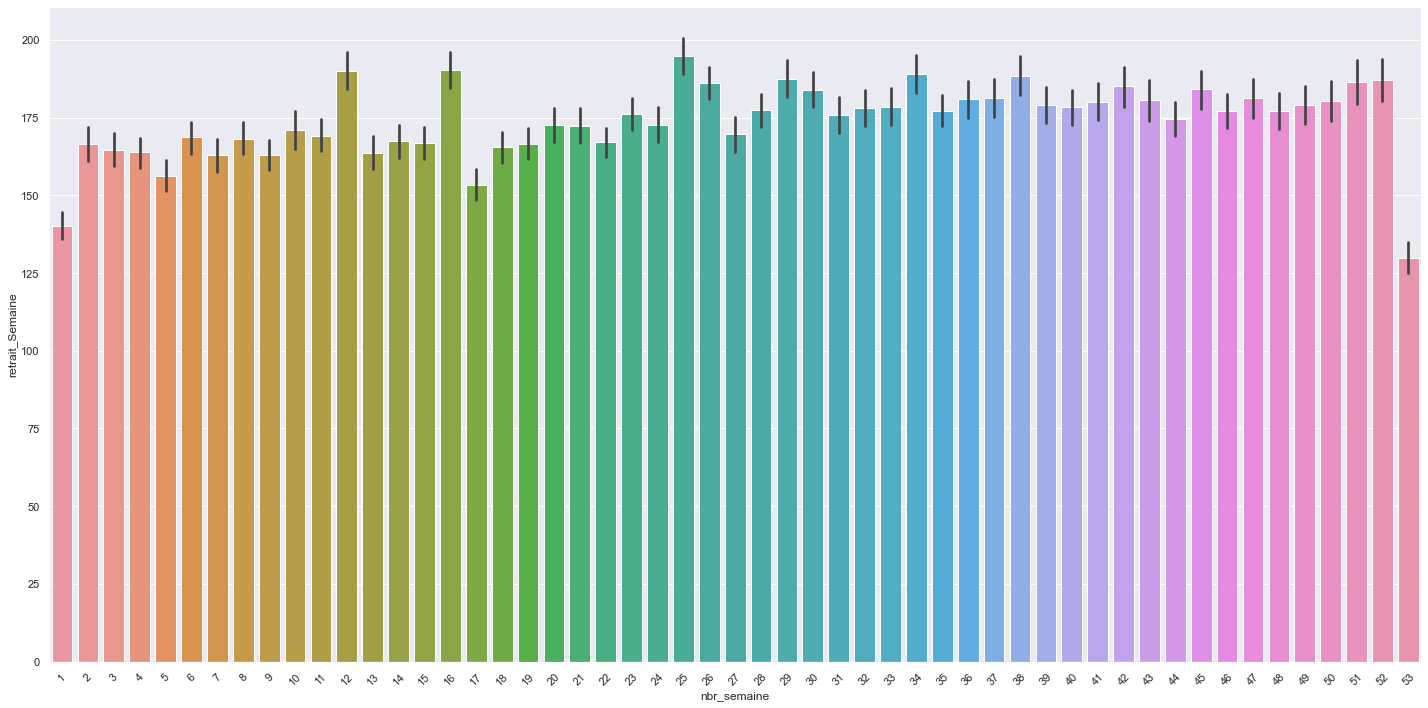

In [33]:
sns.set(style="darkgrid")

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=df, x='nbr_semaine', y='retrait_Semaine')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 
plt.tight_layout() 
plt.show()

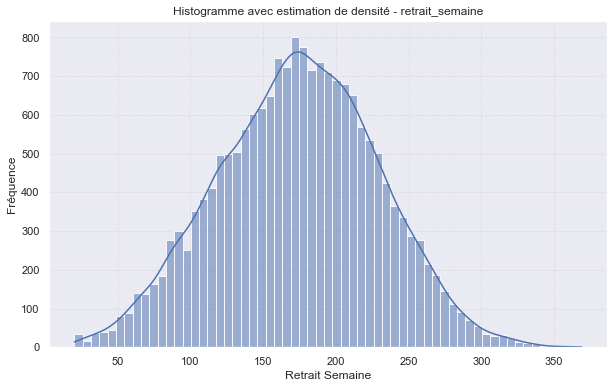

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = 'pastel'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='retrait_Semaine', kde=True,  palette =palette)
plt.title('Histogramme avec estimation de densité - retrait_semaine')
plt.xlabel('Retrait Semaine')
plt.ylabel('Fréquence')
# Modifier la couleur de la grille
plt.grid(True, linestyle='--', alpha=0.5, color='lightgrey')
plt.show()

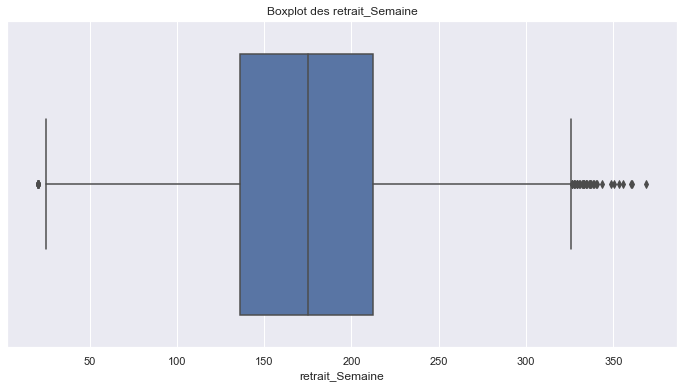

In [35]:
# Visualiser les outliers en utilisant un boxplot 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='retrait_Semaine')
plt.xlabel('retrait_Semaine')
plt.title("Boxplot des retrait_Semaine")
plt.show()

In [36]:
(df['retrait_Semaine']).agg(['skew','kurtosis']).transpose()

skew       -0.040772
kurtosis   -0.243751
Name: retrait_Semaine, dtype: float64

en utilisant la transformation de box-cox on a pu normalisé la distribution de la variable 'retrait_semaine' et ce qui a minimisé le nombre d'outliers (la transformation de Box-Cox est généralement robuste aux valeurs aberrantes).

##### La methode IQR pour detecter les outliers apres la transformation des données:

In [40]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), outliers.index.tolist()

# Trouver les outliers pour la colonne 'retrait_Semaine'
nb_outliers, indices_outliers = detect_outliers_iqr(df, 'retrait_Semaine')

# Afficher le nombre d'outliers et leurs indices
print("Nombre d'outliers détectés pour la variable 'retrait_Semaine':", nb_outliers)
print("Indices des outliers:", indices_outliers)

# Afficher les semaines correspondantes pour chaque outlier
if 'nbr_semaine' in df.columns:
    semaines_outliers = df.loc[indices_outliers, 'nbr_semaine'].value_counts()
    print("Effectif de chaque semaine pour les outliers:")
    print(semaines_outliers)
else:
    print("La colonne 'nbr_semaine' n'est pas présente dans le dataframe.")


Nombre d'outliers détectés pour la variable 'retrait_Semaine': 51
Indices des outliers: [346, 1060, 2244, 2518, 2612, 2974, 3332, 3591, 3697, 3949, 4066, 4106, 4788, 6142, 7971, 8071, 8503, 8699, 8812, 8828, 8839, 8841, 8842, 10234, 11163, 11934, 11972, 12600, 12837, 13243, 13258, 13280, 13289, 13585, 14254, 14573, 14834, 14920, 15172, 15598, 15924, 16285, 16298, 16944, 17592, 17623, 17635, 17948, 17950, 18169, 18306]
Effectif de chaque semaine pour les outliers:
25    5
38    4
52    3
51    3
24    2
36    2
34    2
42    2
43    2
47    2
12    2
11    2
10    2
7     2
46    1
45    1
41    1
49    1
1     1
31    1
39    1
3     1
29    1
23    1
22    1
17    1
14    1
9     1
8     1
53    1
Name: nbr_semaine, dtype: int64
